<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5.1-pandas的数据结构介绍" data-toc-modified-id="5.1-pandas的数据结构介绍-1">5.1 pandas的数据结构介绍</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1">Series</a></span></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-1.2">DataFrame</a></span></li><li><span><a href="#索引对象" data-toc-modified-id="索引对象-1.3">索引对象</a></span></li></ul></li></ul></div>

# 第 5 章 pandas 入门

## 5.1 pandas的数据结构介绍

### Series

In [1]:
import pandas as pd
obj = pd.Series([4, 7, -5, 3])

Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过Series 的values和index属性获取其数组表示形式和索引对象：

In [2]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [3]:
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series：

In [4]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### DataFrame

In [5]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [6]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [7]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [8]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个Series：

In [9]:
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [10]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

> Note：IPython提供了类似属性的访问（即frame2.year）和tab补全。 frame2[column]适用于任何列的名，但是frame2.column只有在列名是一个合理的Python变量名时才适用。

列可以通过赋值的方式进行修改。例如，我们可以给那个空的"debt"列赋上一个标量值或一组值：

In [11]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],index=['one', 'two', 'three', 'four','five', 'six'])

In [12]:
frame2['eastern'] = frame2.state == 'Ohio'

In [13]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


> 注意：不能用frame2.eastern创建新的列。

In [14]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

> 注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改全都会反映到源DataFrame上。通过Series的copy方法即可指定复制列。

另一种常见的数据形式是嵌套字典：

In [16]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [17]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [18]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不会这样：

In [19]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


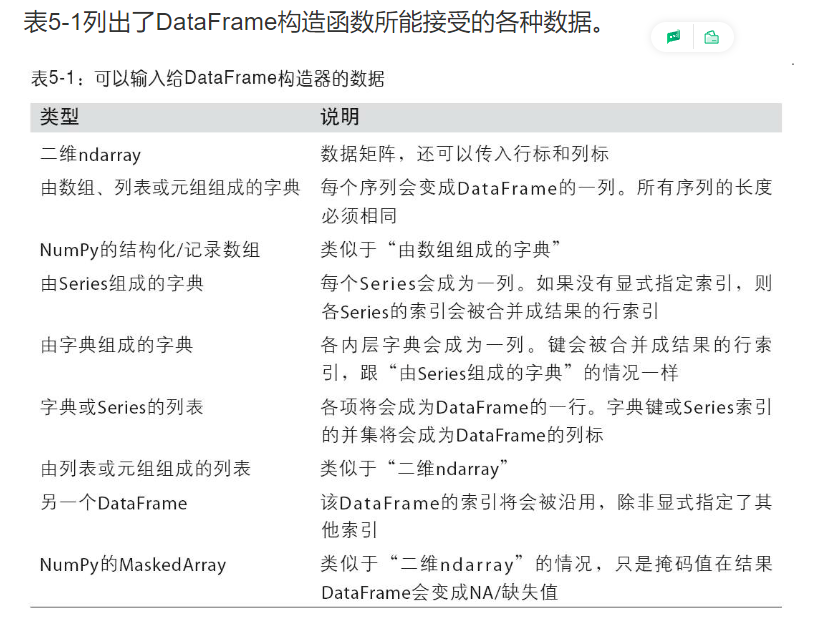

如果设置了DataFrame的index和columns的name属性，则这些信息也会被显示出来：

In [21]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [22]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

### 索引对象